# Team 2 - Google Play Store

![](https://www.brandnol.com/wp-content/uploads/2019/04/Google-Play-Store-Search.jpg)

_For more information about the dataset, read [here](https://www.kaggle.com/lava18/google-play-store-apps)._

## Your tasks
- Name your team!
- Read the source and do some quick research to understand more about the dataset and its topic
- Clean the data
- Perform Exploratory Data Analysis on the dataset
- Analyze the data more deeply and extract insights
- Visualize your analysis on Google Data Studio
- Present your works in front of the class and guests next Monday

## Submission Guide
- Create a Github repository for your project
- Upload the dataset (.csv file) and the Jupyter Notebook to your Github repository. In the Jupyter Notebook, **include the link to your Google Data Studio report**.
- Submit your works through this [Google Form](https://forms.gle/oxtXpGfS8JapVj3V8).

## Tips for Data Cleaning, Manipulation & Visualization
- Here are some of our tips for Data Cleaning, Manipulation & Visualization. [Click here](https://hackmd.io/cBNV7E6TT2WMliQC-GTw1A)

_____________________________

## Some Hints for This Dataset:
- There are lots of null values. How should we handle them?
- Column `Installs` and `Size` have some strange values. Can you identify them?
- Values in `Size` column are currently in different format: `M`, `k`. And how about the value `Varies with device`?
- `Price` column is not in the right data type
- And more...


In [57]:
#Google studio
'https://datastudio.google.com/reporting/89a3f3c2-a0ad-4ce3-a5ce-34a834c1498a'

'https://datastudio.google.com/reporting/89a3f3c2-a0ad-4ce3-a5ce-34a834c1498a'

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re


def normalize_size(data):
  data['Size'] = data['Size'].replace('Varies with device', '0')
  for index, line in data.iterrows():
    app_size = line['Size']
    app_size = re.sub('[+,]', '', app_size)
    mul = 0.000001
    if (app_size.find('M') != -1):
      mul = 1
      app_size = app_size.replace('M', '')
    if (app_size.find('k') != -1):
      mul = 0.001
      app_size = app_size.replace('k', '')
    real_size = float(app_size) * mul
    data['Size'][index] = real_size
  return data 


def normalize_installs(data):
  data['Installs'] = data['Installs'].str.replace('+', '')
  data['Installs'] = data['Installs'].str.replace(',', '')
  data['Installs'] = data['Installs'].str.replace('Free', '0')
  data['Installs'] = [int(x) for x in data['Installs']]
  return data

data = pd.read_csv('googleplaystore.csv')
data = normalize_size(data)
data = normalize_installs(data)
data.to_csv('google_play_store_clean.csv')
# data['Last Updated'] = pd.to_datetime(data['Last Updated'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


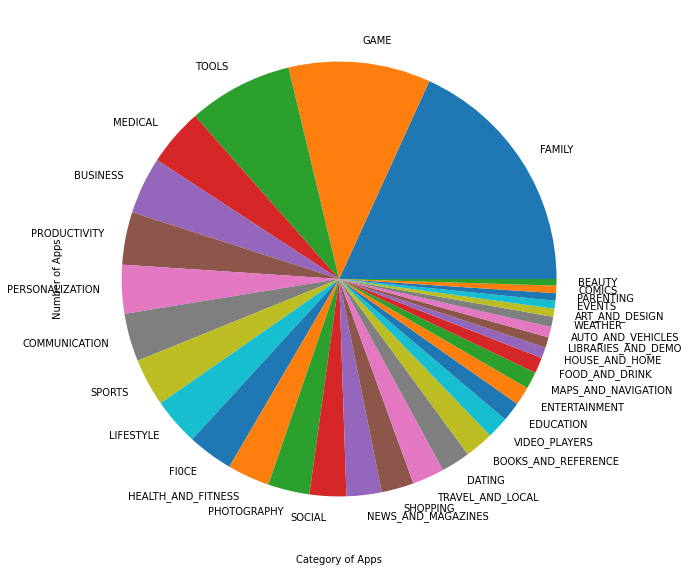

In [56]:
def draw_categories(data):
  plt.figure(figsize = (10,10))
  data["Category"].value_counts().plot(kind='pie')
  plt.ylabel("Number of Apps")
  plt.xlabel("Category of Apps")
  plt.grid()
  plt.show()
draw_categories(data)

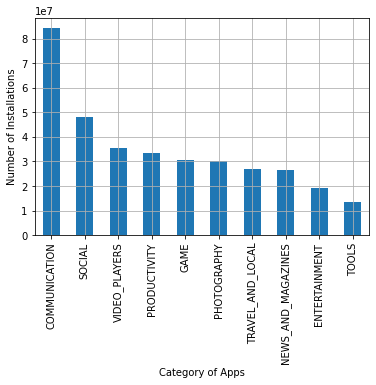

In [4]:
def draw_most_installed_categories(data):
  category_data = data[data['Installs'] > 0].groupby(['Category'])['Installs'].mean()
  category_data.sort_values(ascending=False).head(10).plot(kind = 'bar')
  # category_data = category_data.sort_values(ascending=False).head(5)
  # plt.plot(category_data)
  plt.ylabel("Number of Installations")
  plt.xlabel("Category of Apps")
  plt.grid()
  plt.show()
draw_most_installed_categories(data)

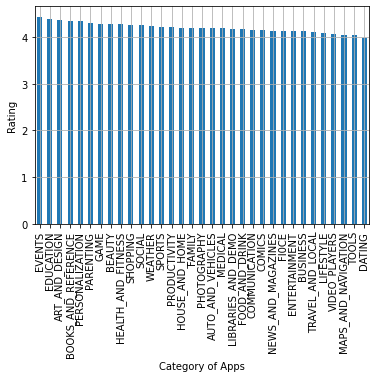

In [5]:
def draw_most_rating_categories(data):
  category_data = data[data['Rating'] > 0].groupby(['Category'])['Rating'].mean()
  category_data.sort_values(ascending=False).plot(kind = 'bar')
  # category_data = category_data.sort_values(ascending=False).head(5)
  # plt.plot(category_data)
  plt.ylabel("Rating")
  plt.xlabel("Category of Apps")
  plt.grid()
  plt.show()
draw_most_rating_categories(data)
# print(data[data['Category'] == '1.9'])

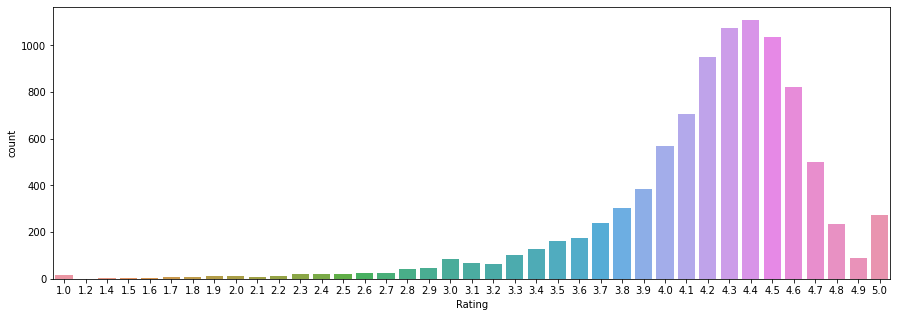

In [42]:
plt.figure(figsize=(15,5))
sns.countplot(data[data['Rating'] > 0]['Rating'], label = "Rating")

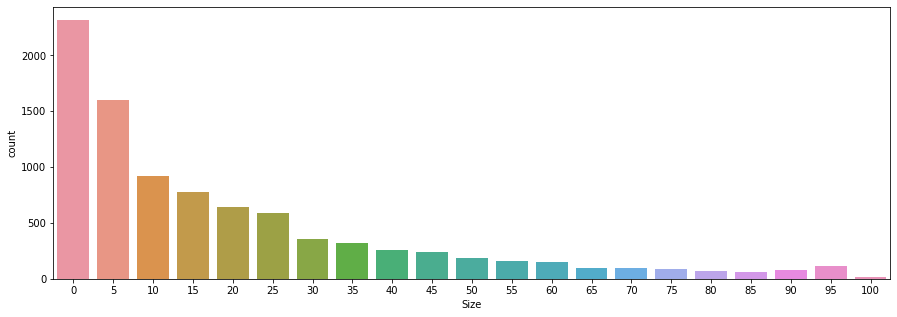

In [51]:
plt.figure(figsize=(15,5))
sns.countplot((data[data['Size'] > 0]['Size'] / 5).astype(int) * 5 , label = "Size")

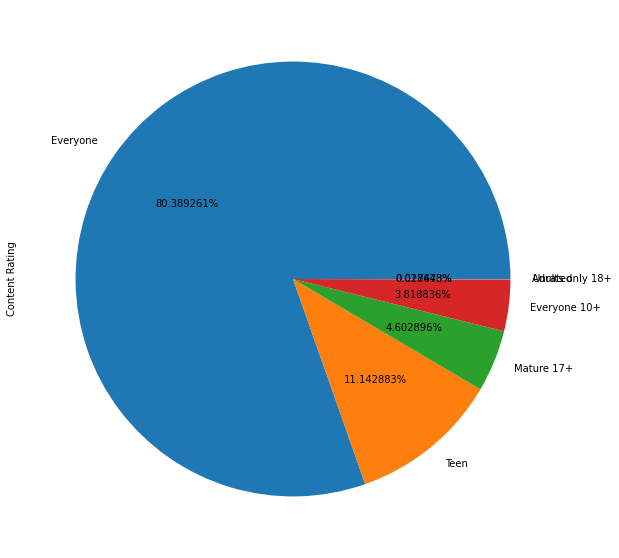

In [53]:
def content_rating(data):
  plt.figure(figsize = (10,10))
  data['Content Rating'].value_counts().plot(kind='pie', autopct = "%f%%")
  plt.show()
content_rating(data)

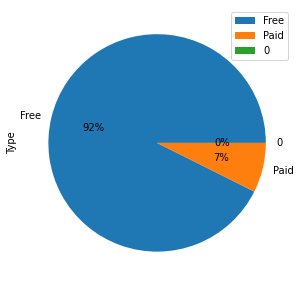

In [8]:
plt.figure(figsize = (5,5))
data["Type"].value_counts().plot(kind='pie',autopct = "%i%%")
plt.legend()
plt.show()

In [9]:
data[data['Installs'] == data['Installs'].max()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Android Max Ver
152,Google Play Books,BOOKS_AND_REFERENCE,3.9,1433233,0,1000000000,Free,0,Teen,Books & Reference,"August 3, 2018",Varies with device,Varies with device,NaN
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,0,1000000000,Free,0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device,NaN
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,0,1000000000,Free,0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device,NaN
338,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9642995,0,1000000000,Free,0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device,NaN
340,Gmail,COMMUNICATION,4.3,4604324,0,1000000000,Free,0,Everyone,Communication,"August 2, 2018",Varies with device,Varies with device,NaN
341,Hangouts,COMMUNICATION,4.0,3419249,0,1000000000,Free,0,Everyone,Communication,"July 21, 2018",Varies with device,Varies with device,NaN
381,WhatsApp Messenger,COMMUNICATION,4.4,69119316,0,1000000000,Free,0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device,NaN
382,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56646578,0,1000000000,Free,0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device,NaN
386,Hangouts,COMMUNICATION,4.0,3419433,0,1000000000,Free,0,Everyone,Communication,"July 21, 2018",Varies with device,Varies with device,NaN
391,Skype - free IM & video calls,COMMUNICATION,4.1,10484169,0,1000000000,Free,0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device,NaN


Text(0.5, 1.0, 'Most Reviewed Apps in Play Store')

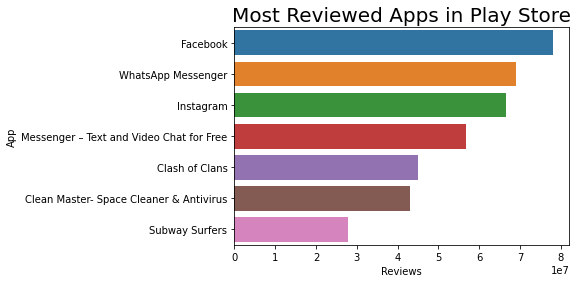

In [23]:
review_data = data.sort_values(['Reviews'],ascending = 0 ).head(20)
ax = sns.barplot(x = 'Reviews' , y = 'App' , data = review_data )
ax.set_xlabel('Reviews')
ax.set_title("Most Reviewed Apps in Play Store", size = 20)

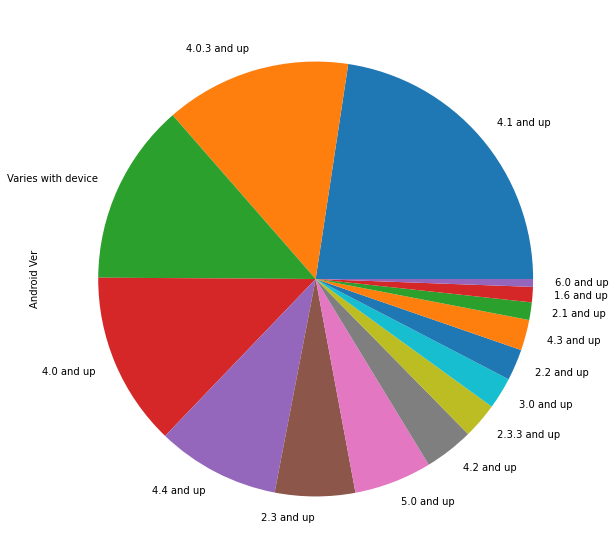

In [27]:
plt.figure(figsize = (10,10))
data['Android Ver'].value_counts().head(15).plot(kind= 'pie')
plt.show()